# Warmup: DataFrame

This is a warmup exercise for a completion grade only - but should be a valuable self-check.

Create a simple, **annotated** notebook to read in the Titanic data set from a server, here
* [Links to the server (github)](https://raw.githubusercontent.com/eclarson/DataMiningNotebooks/master/data/titanic.csv)
* OR from your laptop locally with file path set appropriately

Then do the following operations:
* print the first few records of the file to look at the data
* print some basic statistics
* print out the number who survived

Now, delete columns (features) that you think are not useful and **explain** why you chose that in your notebook

Choose some other data manipulation to explore and implement and describe your choice. Here are some ideas
* Explore grouping the data and printing interesting information by group
* Explore encoding categorical data using one-hot encoding.
* Explore creating a new quantized feature for numeric data

In [ ]:
### Imports ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### Read Titanic data ###
df = pd.read_csv("datasets/titanic.csv")

# Print the first few records of the file to look at the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
### Print some basic statistics ###
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
### Print out the number who survived ###
print(df['Survived'].sum())

342


## Delete columns that that you think are not useful and explain why you chose that in your notebook

I will drop the `PassengerId`, `Name`, `Ticket`, and `Cabin` columns because they don’t provide direct predictive value or have too many missing values. I chose to drop the `PassengerId`, `Name`, and `Ticket` column because are just arbitrary identifiers. I dropped the `Cabin` column because there are too many missing values.

In [ ]:
### Dropping the above mentioned cols ###
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Choose some other data manipulation to explore and implement and describe your choice

I chose to explore the gender and age distributions of the dataset. Displaying the gender distribution allows us to understand the proportion of male versus female passengers, which is important since survival rates differed by gender on the Titanic. Meanwhile, analyzing the age distribution provides insights into the spread of passengers across different age groups. This helps reveal whether the majority of passengers were children, young adults, or older adults, and can also highlight survival trends across age ranges.

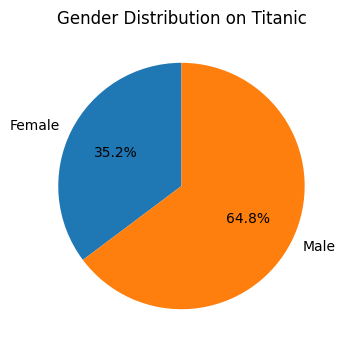

In [ ]:
### Group by gender to see the split ###
df_gender = df.groupby(by="Sex")

gender_counts = df_gender.size()

plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution on Titanic")
plt.show()

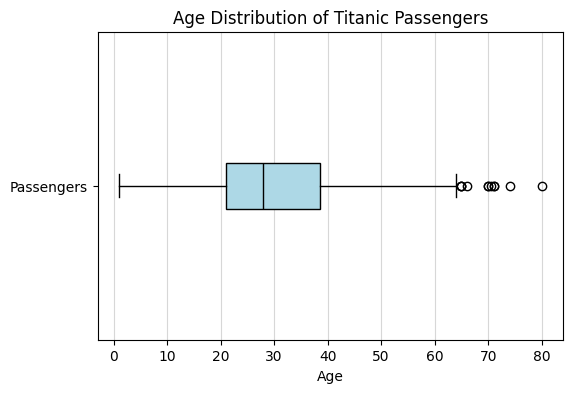

In [59]:
### Group by age to see the distribution ###
df_age = df.groupby(by="Age")

age_counts = df_age.size()

# Remove ages less than 1
age_counts = age_counts[age_counts.index >= 1]

# Expand into actual values as numpy array
age_data = age_counts.index.repeat(age_counts.values).astype(float).to_numpy()

# Plot boxplot (cat whisker plot)
plt.figure(figsize=(6,4))
plt.boxplot(age_data, vert=False, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="black"),
            whiskerprops=dict(color="black"),
            medianprops=dict(color="black"))

plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.yticks([1], ["Passengers"])
plt.grid(axis="x", alpha=0.5)
plt.show()
